# Trabalho de Inferência Estatística

Micael Vinícius Lira Prado - 11857991 - SME0221 Introdução à Inferência Estatística

Meu tema escolhido para o projeto foi o suicídio. É um tema muito relevante hoje, pois as taxas de suicídio nesse século estão extremamente altas. Os índices de depressão estão tremendamente altos, mas, devido à pandemia, os veículos de informação e mídia não estão dando devida luz a esse problema. Inclusive, devido à pandemia, os casos de suicídio tem se agravado.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dados = pd.read_csv('https://raw.githubusercontent.com/micaelvi0208/InferenciaEstatistica/main/who_suicide_statistics.csv')

dados.head()

country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0

Meus dados vieram da OMS, mas como não achei exclusivamente do Brasil, purifiquei meus dados da forma que julguei mais adequada, removendo variáveis e amostras que não serão utilizadas.

# Preparando minha base de dados, selecionando o país a ser estudado, o recorte temporal e as v.a. 

In [63]:
dados_pais =  dados.set_index('country')
dados_Brasil = dados_pais.loc['Brazil']  # Cria dataframe apenas com dados do Brasil
dadosBrasil_XXI = dados_Brasil.loc[dados_Brasil['year'] > 2000]  # Cria dataframe com apenas os dados de 2001 a 2015
dadosBrasil_XXI =  dadosBrasil_XXI.set_index('year')
dadosBrasil_XXI.head()

sex          age  suicides_no  population
year                                              
2001  female  15-24 years        393.0  17361833.0
2001  female  25-34 years        286.0  14578443.0
2001  female  35-54 years        578.0  21260886.0
2001  female   5-14 years         53.0  17212816.0
2001  female  55-74 years        206.0   9044684.0

In [64]:
dados_final =  dadosBrasil_XXI.set_index('sex')
dados_final = dados_final.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
del dados_final['population']

dados_final.head()

sex          age  suicides_no
0  female  15-24 years        393.0
1  female  25-34 years        286.0
2  female  35-54 years        578.0
3  female   5-14 years         53.0
4  female  55-74 years        206.0

Essa é a base de dados com a qual vamos trabalhar. Abaixo, crio mais dois dataframes isolando os sexos, caso seja necessário trabalhar com as amostras isoladamente.

In [65]:
dados_masc = dados_final.loc[dados_final['sex'] == 'male']
del dados_masc['sex']
dados_masc = dados_masc.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
del dados_masc['index']
dados_masc.head()

age  suicides_no
0  15-24 years       1262.0
1  25-34 years       1398.0
2  35-54 years       2227.0
3   5-14 years         58.0
4  55-74 years        964.0

In [66]:
dados_fem = dados_final.loc[dados_final['sex'] == 'female']
del dados_fem['sex']
dados_fem = dados_fem.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
del dados_fem['index']
dados_fem.head()

age  suicides_no
0  15-24 years        393.0
1  25-34 years        286.0
2  35-54 years        578.0
3   5-14 years         53.0
4  55-74 years        206.0

#Análise Exploratória de Dados

Aplicamos o método describe para exibir as estatísticas descritivas, média, desvio padrão e os quantis.

Medidas descritivas sem considerer o sexo.

In [67]:
dados_final.describe()

suicides_no
count   180.000000
mean    764.588889
std     779.237263
min      41.000000
25%     176.750000
50%     397.500000
75%    1270.250000
max    3238.000000

Medidas descritivas para o sexo masculino.

In [68]:
dados_masc.describe()

suicides_no
count    90.000000
mean   1205.911111
std     876.685146
min      48.000000
25%     308.250000
50%    1270.500000
75%    1702.750000
max    3238.000000

Faço gráfico de barras e boxplot para o número de suicídios, considerando as amostras masculinas.

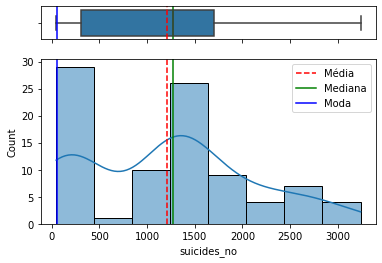

In [69]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=dados_masc['suicides_no'].mean()
median=dados_masc['suicides_no'].median()
mode=dados_masc['suicides_no'].mode().values[0]

sns.boxplot(data=dados_masc, x="suicides_no", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=dados_masc, x="suicides_no", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Média")
ax_hist.axvline(median, color='g', linestyle='-', label="Mediana")
ax_hist.axvline(mode, color='b', linestyle='-', label="Moda")

plt.legend()

ax_box.set(xlabel='')
plt.show()

A média e a mediana estão muito próximas, mas são muito maiores que a moda

In [70]:
from scipy.stats import kurtosis

kurtosis(dados_masc['suicides_no'])

-0.7400686881639893

Podemos dizer que a distribuição é platicurtica, é relativamente achatada.

Medidas descritivas para o sexo feminino.

In [71]:
dados_fem.describe()

suicides_no
count    90.000000
mean    323.266667
std     242.404240
min      41.000000
25%      62.000000
50%     345.000000
75%     412.500000
max     910.000000

Faço gráfico de barras e boxplot para o número de suicídios, considerando as amostras femininas.

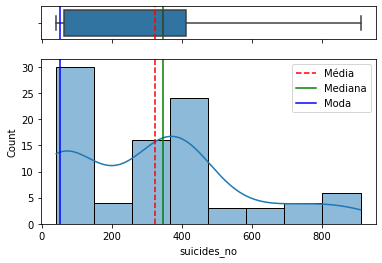

In [72]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=dados_fem['suicides_no'].mean()
median=dados_fem['suicides_no'].median()
mode=dados_fem['suicides_no'].mode().values[0]

sns.boxplot(data=dados_fem, x="suicides_no", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=dados_fem, x="suicides_no", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Média")
ax_hist.axvline(median, color='g', linestyle='-', label="Mediana")
ax_hist.axvline(mode, color='b', linestyle='-', label="Moda")

plt.legend()

ax_box.set(xlabel='')
plt.show()

A média é menor que a mediana, mas ambos são maiores que a moda.

In [73]:
kurtosis(dados_fem['suicides_no'])

-0.23955188674503747

A distribuição é menos achatada que a dos dados masculinos.

Tabela de frequências dos sexos

In [74]:
tab = pd.crosstab(index=dados_final['sex'], columns='count')
tab

col_0   count
sex          
female     90
male       90

Gráfico de pizza dos sexos

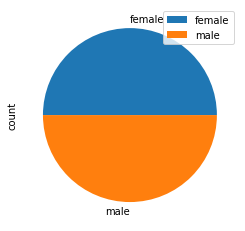

In [75]:
plot = tab.plot.pie(y='count')

Aqui, começo a analisar a associação entre as variáveis

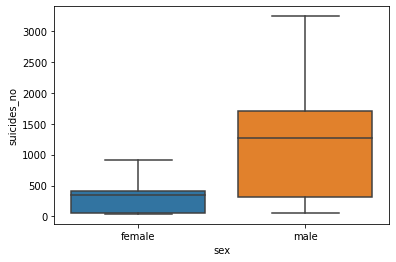

In [76]:
ax = sns.boxplot(x='sex', y='suicides_no', data=dados_final)

Nota-se que o número de suicídio entre homens atinge valores muito maiores que entre a população feminina. Por exemplo, a mediana do número de suicídio para as mulheres é próxima ao primeiro quantil masculino, a mediana masculina ultrapassa o valor máximo feminino. 

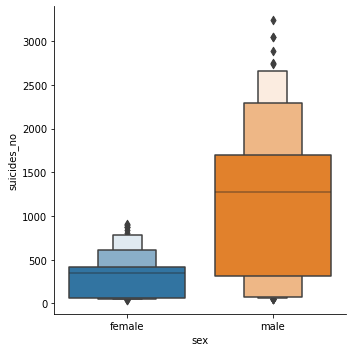

In [77]:
ax = sns.catplot(x='sex', y='suicides_no', kind='boxen', data=dados_final)

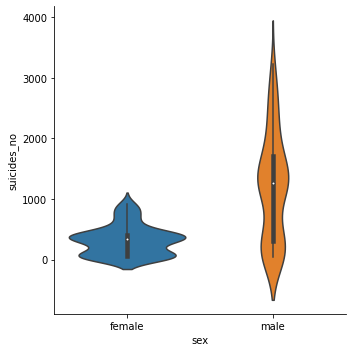

In [78]:
ax = sns.catplot(x='sex', y='suicides_no', kind='violin', data=dados_final)

Text(0, 0.5, 'numeros de suicidio')

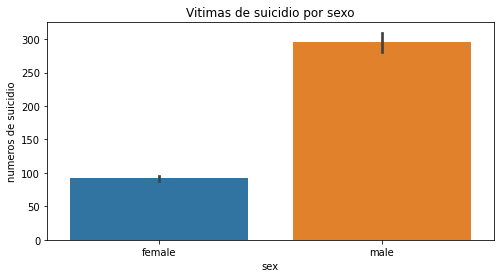

In [79]:
# Número médio de suicídios por sexo


# Estabelecendo o tamanho do gráfico
plt.figure(figsize=(8,4))

# Título
plt.title("Vitimas de suicidio por sexo")

# Gráfico de barras com número médio de suicídios por sexo
sns.barplot(x=dados['sex'], y=dados['suicides_no'])

# Label para eixo vertical
plt.ylabel("numeros de suicidio")



# Teste para normalidade dos dados

$X_1, \ldots, X_n$ amostra aleatória dos dados para o sexo masculino

$H_0: X_i \sim Normal$ contra

$H_1:  X_i $ tem outra distribuição

In [80]:
from scipy import stats

shapiro_test = stats.shapiro(dados_masc['suicides_no'])
shapiro_test

(0.9284647703170776, 9.810348274186254e-05)

In [81]:
p_value = shapiro_test[1]

if p_value < 0.05: print ('Rejeito H0') 
else: print ('Não rejeito H0')

Rejeito H0


$X_1, \ldots, X_n$ amostra aleatória dos dados para o sexo feminino

$H_0: X_i \sim Normal$ contra

$H_1:  X_i $ tem outra distribuição

In [92]:
from scipy import stats

shapiro_test = stats.shapiro(dados_fem['suicides_no'])
shapiro_test 

(0.8919051289558411, 1.7904002334034885e-06)

In [93]:
p_value = shapiro_test[1]

if p_value < 0.05: print ('Rejeito H0') 
else: print ('Não rejeito H0')

Rejeito H0


Como minhas amostras, tanto da população masculina, quanto da feminina, não seguem uma distribuição normal, teremos que normalizá-los. Outra solução seria utilizar para o teste de hipóteses testes que não pressupõe normalidade, porém esses se baseiam nas posições das observações (mediana), não nas suas grandezas numéricas (média).

# Teste de comparação de médias

Primeiramente, vamos normalizar os dados.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.5211280961462611


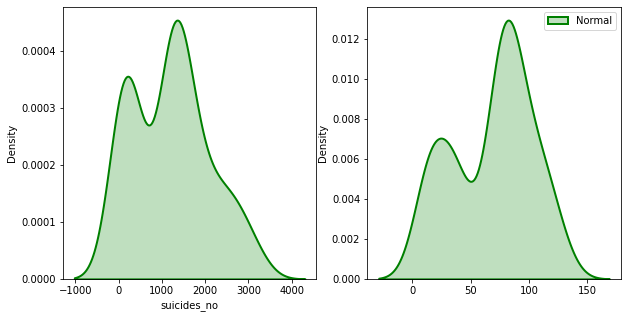

In [84]:
fitted_data, fitted_lambda = stats.boxcox(dados_masc['suicides_no'])
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(dados_masc['suicides_no'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [85]:
shapiro_test = stats.shapiro(fitted_data)
shapiro_test

(0.917380154132843, 2.6546107619651593e-05)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.34896499111679996


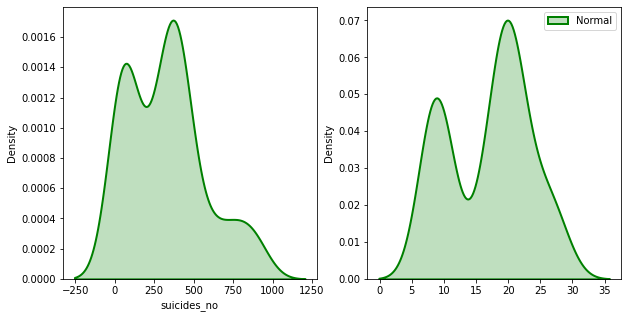

In [86]:
fitted_data, fitted_lambda = stats.boxcox(dados_fem['suicides_no'])
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(dados_fem['suicides_no'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [87]:
shapiro_test = stats.shapiro(fitted_data)
shapiro_test

(0.8901377320289612, 1.5052082744659856e-06)

Obter a normalidade entre esses dois grupos será muito difícil, o método acima, Transformação de Box e Cox, não funcionou. Eis o porquê:

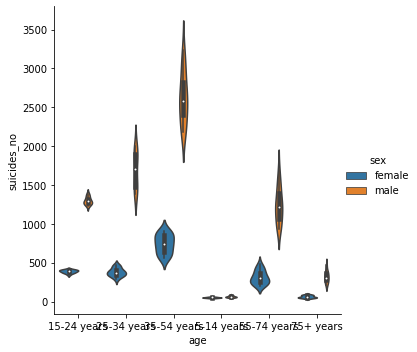

In [89]:
ax = sns.catplot(x='age', y='suicides_no', hue='sex', kind='violin', data=dados_final)

A distribuição parece ser diferente para idades diferentes. Por isso, quando removemos essa variável da análise, aparece a multimodalidade.

Seguiremos então com o teste de Mann-Whitney, o qual é um teste não paramétrico, isto é, não pressupõe a normalidade dos dados.

Assuma \n
$X_1, \ldots, X_n$ amostra aleatória dos dados para o sexo masculino

$Y_1, \ldots, Y_n$ amostra aleatória dos dados para o sexo feminino

$H_0: \mu_x = \mu_y$ contra

$H_1:  \mu_x \neq \mu_y $ 

In [97]:
from scipy.stats import mannwhitneyu

# Seja U1 a estatística utilizada, média, para os dados masculinos e p o p-valor
U1, p = mannwhitneyu(dados_masc['suicides_no'], dados_fem['suicides_no'])
print("Media para dados da populacao masculina:")
print(U1)
print("p-valor:")
print(p)

Media para dados da populacao masculina:
1731.5
p-valor:
1.658280721216077e-11


In [98]:
if p < 0.05: print ('Rejeito H0') 
else: print ('Não rejeito H0')

Rejeito H0


Conclusão: como o p-valor é muito menor que 0.05, a probabilidade de que a diferença observada entre os grupos seja ao acaso é muito pequena. Logo, considero que há diferença significativa entre os grupos.